In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Placement_Data_Full_Class.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1.0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2.0,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3.0,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4.0,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5.0,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
213,212.0,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
214,213.0,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
215,214.0,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
#is a great way to get a quick count of null values in each column of a DataFrame.
dataset.isnull().sum()

sl_no              2
gender             2
ssc_p              2
ssc_b              2
hsc_p              2
hsc_b              2
hsc_s              2
degree_p           2
degree_t           2
workex             2
etest_p            2
specialisation     2
mba_p              2
status             2
salary            69
dtype: int64

#1)Replace the NaN values with correct value. And justify why you have chosen the same.

In [5]:
#Rmove extra empyt rows
dataset=dataset.dropna(axis=0, how='all').dropna(axis=1, how='all')
#fills missin values (NaNs)in this column with 0
dataset["salary"].fillna(0,inplace=True)
dataset.isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_6352\3521761762.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["salary"].fillna(0,inplace=True)


sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [6]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1.0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2.0,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3.0,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4.0,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5.0,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
213,212.0,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
214,213.0,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
215,214.0,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


2)How many of them are not placed?

In [7]:
#Count the number of rows where "status" is not "Placed"
Not_Placed_df=(dataset['status']=='Not Placed').sum()
print(Not_Placed_df)

67


#3)Find the reason for non placement from the dataset?

     ssc_p  hsc_p  degree_p  etest_p  mba_p
3     56.0   52.0     52.00    66.00  59.43
5     55.0   49.8     67.25    55.00  51.58
6     46.0   49.2     79.00    74.28  53.29
11    58.0   70.0     61.00    54.00  52.21
14    47.0   55.0     65.00    62.00  65.04
..     ...    ...       ...      ...    ...
200   67.0   70.0     65.00    88.00  71.96
203   54.2   63.0     58.00    79.00  58.44
208   41.0   42.0     60.00    97.00  53.39
210   43.0   60.0     65.00    92.66  62.92
216   62.0   58.0     53.00    89.00  60.22

[67 rows x 5 columns]
                ssc_p      hsc_p   degree_p    etest_p      mba_p
status                                                           
Not Placed  57.544030  58.395522  61.134179  69.587910  61.612836
Placed      71.721486  69.926554  68.740541  73.238041  62.579392


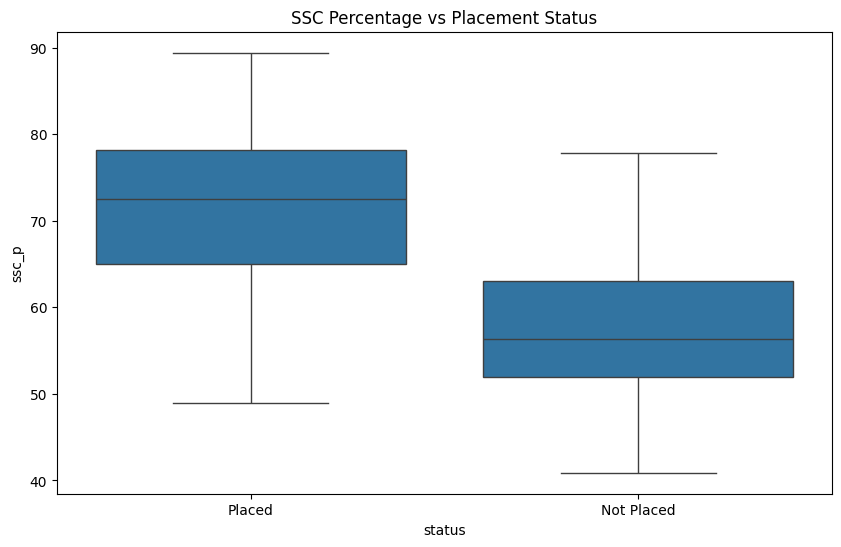

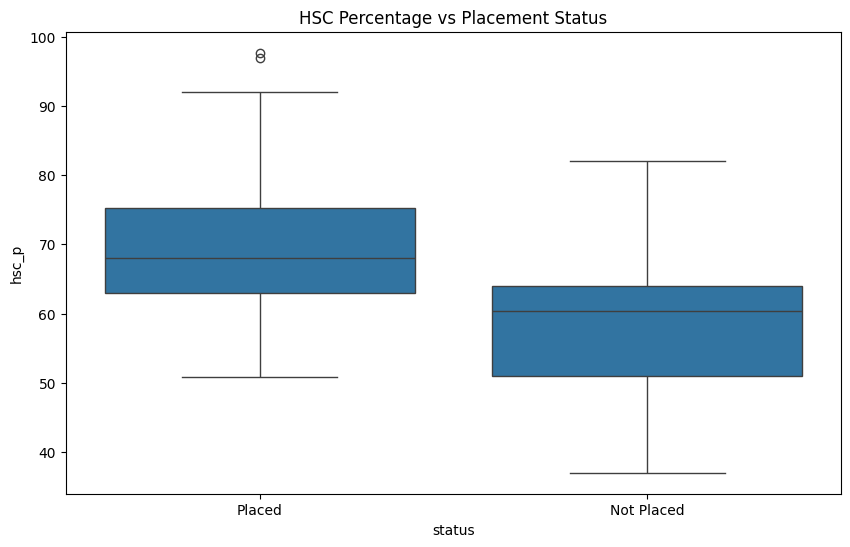

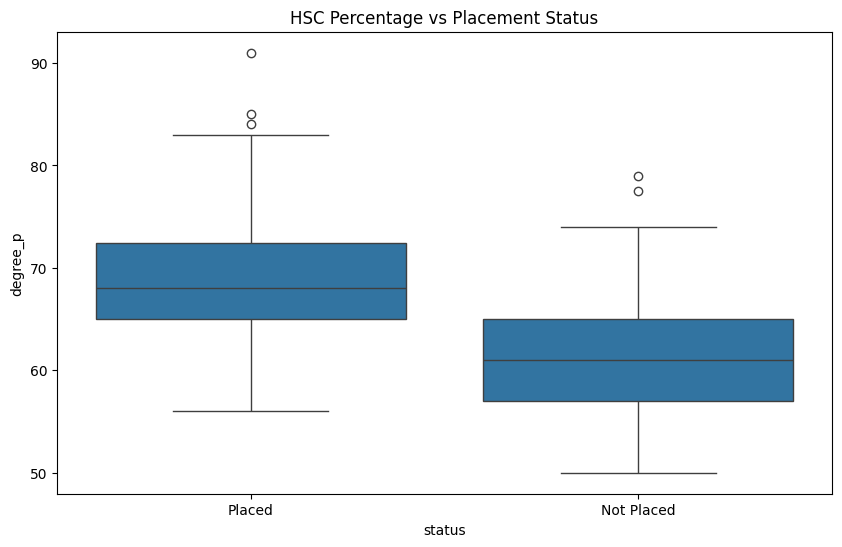

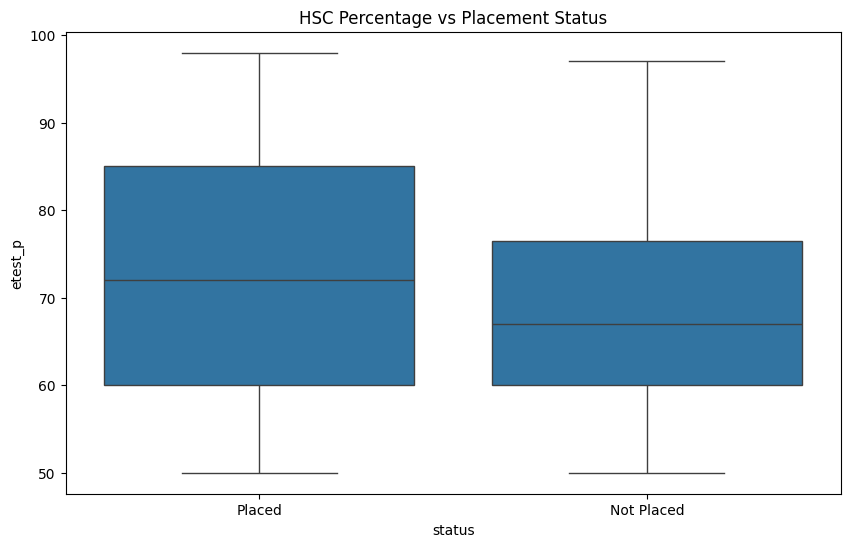

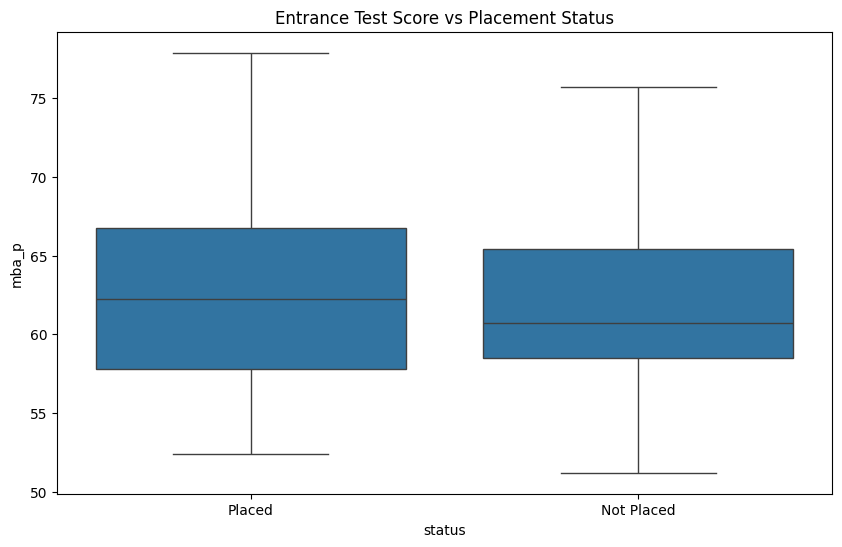

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is stored in a DataFrame 'df'
# Filter for non-placement rows
non_placed = dataset[dataset['status'] == 'Not Placed']

# Print the first few rows of the non-placement data
print(non_placed[['ssc_p', 'hsc_p', 'degree_p', 'etest_p','mba_p']])

# Compare the mean scores for placed vs non-placed candidates
mean_scores = dataset.groupby('status')[['ssc_p', 'hsc_p', 'degree_p', 'etest_p','mba_p']].mean()

# Print the mean scores
print(mean_scores)

# Plotting the data for better visualization

# Boxplot for SSC percentage vs status
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='ssc_p', data=dataset)
plt.title('SSC Percentage vs Placement Status')
plt.show()

# Boxplot for HSC percentage vs status
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='hsc_p', data=dataset)
plt.title('HSC Percentage vs Placement Status')
plt.show()
# Boxplot for degree_p percentage vs status
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='degree_p', data=dataset)
plt.title('HSC Percentage vs Placement Status')
plt.show()
# Boxplot for etest_p percentage vs status
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='etest_p', data=dataset)
plt.title('HSC Percentage vs Placement Status')
plt.show()

# Boxplot for Entrance Test Score vs status
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='mba_p', data=dataset)
plt.title('Entrance Test Score vs Placement Status')
plt.show()

#4)What kind of relation between salary and mba_p

In [9]:
#dataset.corr(numeric_only=True)

In [10]:
dataset['mba_p'].corr(dataset['salary'])

np.float64(0.13982273892615557)

#5)Which specialization is getting minimum salary?

In [11]:
print(dataset['specialisation'].value_counts())

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64


In [12]:
# Filter the dataset for 'MK & FIN' specialization
mk_fin_salaries = dataset[(dataset['specialisation'] == 'Mkt&Fin')&(dataset['salary']> 0)]['salary']
# Find the minimum salary in 'MK & FIN'
min_salary_mk_fin = mk_fin_salaries.min()

# Filter the dataset for 'MK & HR' specialization
mk_hr_salaries = dataset[(dataset['specialisation'] == 'Mkt&HR')&(dataset['salary']> 0)]['salary']
# Find the minimum salary in 'MK & HR'
min_salary_mk_hr = mk_hr_salaries.min()

print(f"Minimum salary for MK & FIN: {min_salary_mk_fin}")
print(f"Minimum salary for MK & HR: {min_salary_mk_hr}")

Minimum salary for MK & FIN: 200000.0
Minimum salary for MK & HR: 200000.0


 #6)How many of them getting above 500000 salary?

In [13]:
max=500000
Max_Salary=(dataset['salary']>max).sum()

High_salaries=dataset[dataset['salary']>max]
#tolist() cnverts an object into a list 
gender_list=High_salaries['gender'].tolist()

print(f"gender : {gender_list}")
print(f"The number of individuals with a salary above five lakh is : {Max_Salary}")

gender : ['M', 'M', 'F']
The number of individuals with a salary above five lakh is : 3


#7)Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)(ANAVO)

In [14]:
#scientificComputationlIibrary
import scipy.stats as stats

stats.f_oneway(dataset['etest_p'],dataset['mba_p'])

F_onewayResult(statistic=np.float64(98.64487057324706), pvalue=np.float64(4.672547689133573e-21))

In [15]:
#The test result (statistic = 0.46, p-value = 0.64) indicates that there is no statistically significant difference,and we fail to reject the null hypothesis

In [16]:
#Reject null hypothesis p<0.05
#H0 (Null Hypothesis): There is no significant difference 
#H1 (Alternative Hypothesis): There is a significant difference 

 #8)Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make
decision using Hypothesis Testing)

In [17]:
from scipy.stats import ttest_ind
Sci_Tech = dataset[dataset['degree_t']=='Sci&Tech']['salary']
Mkt_HR = dataset[dataset['specialisation']=='Mkt&HR']['salary']
ttest_ind(Sci_Tech,Mkt_HR)

TtestResult(statistic=np.float64(2.692041243555374), pvalue=np.float64(0.007897969943471179), df=np.float64(152.0))

In [18]:
#Reject null hypothesis p<0.05
#accept alternate hypothesis 

#9)Convert the normal distribution to standard normal distribution for salary column

In [19]:
import seaborn as sns

C:\Users\user\AppData\Local\Temp\ipykernel_6352\2049611699.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["salary"])


<Axes: xlabel='salary', ylabel='Density'>

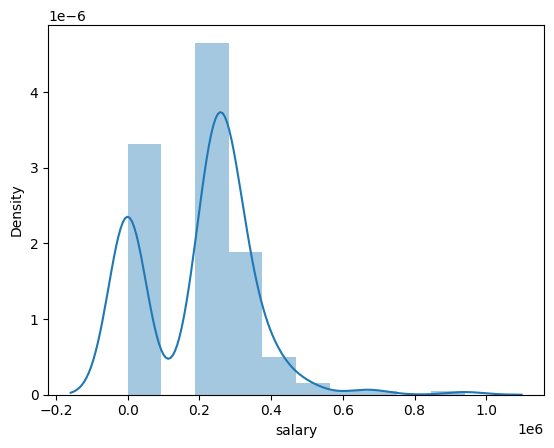

In [20]:
sns.distplot(dataset["salary"])

In [21]:
def stdNBgraph(dataset):

    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True)

    sum(z_score)/len(z_score)    

C:\Users\user\AppData\Local\Temp\ipykernel_6352\410337355.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True)


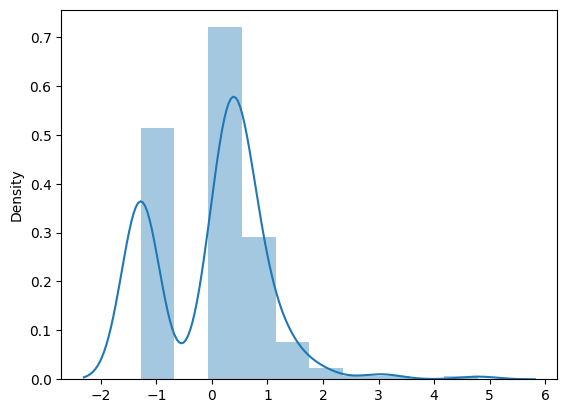

In [22]:
stdNBgraph(dataset['salary'])

#10)What is the probability Density Function of the salary range from 700,000 to 900,000

In [23]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    #kde for cure kws Histogram

    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'red'},color='green')
    pyplot.axvline(startrange,color='blue')
    pyplot.axvline(endrange,color='blue')

    #generate a sample 
    sample = dataset
    #calculate parameters
    sample_mean = sample.mean()
    sample_std = sample.std()
    print('Mean%.3f,standard Deviation=%.3f' % (sample_mean, sample_std))

    #define the distribution
    dist = norm(sample_mean, sample_std)

    #sample probabilities for a range of outcomes(the area between range(60,65))

    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("the area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

C:\Users\user\AppData\Local\Temp\ipykernel_6352\1841291214.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'red'},color='green')


Mean198702.326,standard Deviation=154780.927
the area between range(700000,900000):0.0005973310593974868


np.float64(0.0005973310593974868)

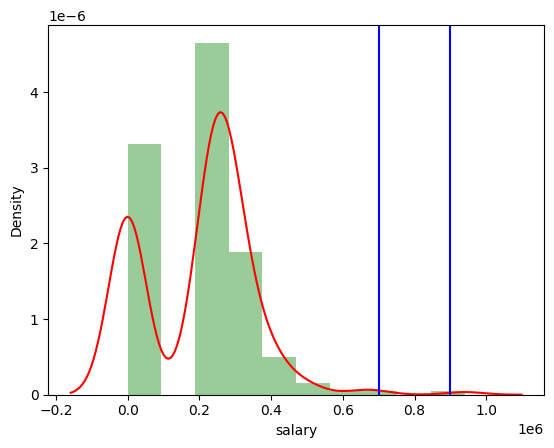

In [24]:
get_pdf_probability(dataset["salary"],700000,900000)

 11)Test the similarity between the degree_t(Sci&Tech)with respect to
etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)

In [25]:
from scipy.stats import ttest_ind

SciTech_etest_p = dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
SciTech_mba_p = dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
ttest_ind(SciTech_etest_p,SciTech_mba_p)

TtestResult(statistic=np.float64(4.532000225151251), pvalue=np.float64(1.4289217003775636e-05), df=np.float64(116.0))

In [26]:
#Reject null hypothesis p<0.05
#accept null hypothesis and reject alternate hypothesis 

#12)Which parameter is highly correlated with salary?

In [27]:
slected_colums=['mba_p','ssc_p','hsc_p','degree_p','etest_p']

In [28]:
salary_correlation=dataset[slected_colums +['salary']].corr()['salary'].drop('salary')

In [29]:
salary_correlation

mba_p       0.139823
ssc_p       0.538090
hsc_p       0.452569
degree_p    0.408371
etest_p     0.186988
Name: salary, dtype: float64

In [30]:
#dataset['ssc_p'].corr(dataset['salary'])
#(0.538089713348551)